In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange

In [2]:
MAX_ITER = 100
SIZE = 500

In [3]:
# Checking if a point is part of the mandelbrot set
@jit(nopython=True)
def mandelbrot(z, max_iter):
    c = z
    for i in range(max_iter):
        if abs(z) > 2:
            return i
        z = z*z + c
    return max_iter

# Utility for plotting
def plot_mandelbrot(counts, save=True, show=True):
    plt.imshow(counts, cmap='hot', extent=[-2, 0.5, -1, 1],)
    plt.colorbar(shrink=0.85, label='# iterations')
    plt.axis('off')
    if save:
        plt.savefig(f'mandelbrot_fixed_{MAX_ITER}_{SIZE}.png', dpi=SIZE/5)
    if show:
        plt.show()

# Running mandelbrot assessment on a space
@jit(nopython=True, parallel=True)
def mandelbrot_parallel_fixed(max_iter=MAX_ITER, size=SIZE, plot=True, save=True, show=True):
    real_range = np.linspace(-2, 0.5, size)
    imag_range = np.linspace(-1, 1, size)
    counts = np.zeros((size, size), dtype=np.int32)
    for i in prange(size):
        for j in prange(size):
            z = complex(real_range[j], imag_range[i])
            counts[i, j] = mandelbrot(z, max_iter)
    return counts

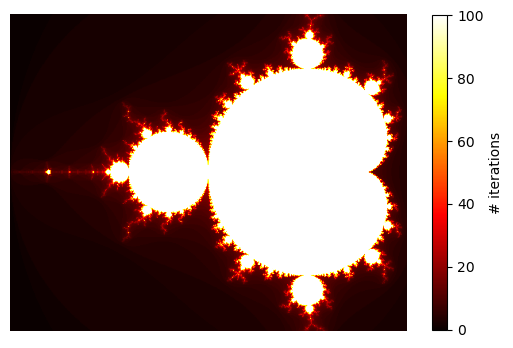

In [4]:
counts = mandelbrot_parallel_fixed()
plot_mandelbrot(counts)